In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lena = cv2.imread('lena.png')
satoru = cv2.imread('satoru.jpg')

In [3]:
cv2.imshow('lena',lena)
cv2.waitKey(0) 
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [4]:
cv2.imshow('Satoru',satoru)
cv2.waitKey(0) 
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


TypeError: Image data of dtype object cannot be converted to float

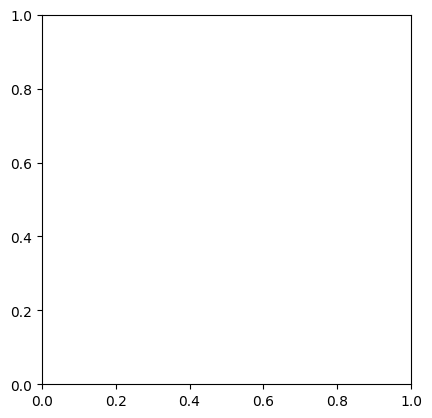

In [5]:
plt.imshow(lena)
plt.axis('off')
plt.show()

In [6]:
lenaRGB = cv2.cvtColor(lena,cv2.COLOR_BGR2RGB)
plt.imshow(lenaRGB)
plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


TypeError: Image data of dtype object cannot be converted to float

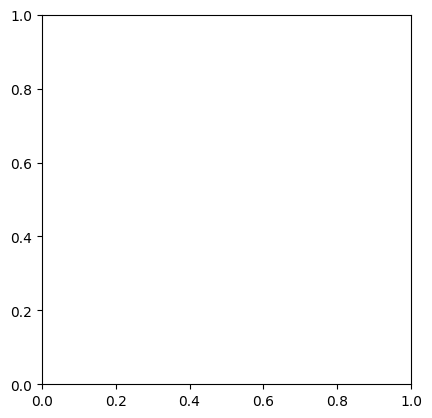

In [7]:
plt.imshow(satoru)
plt.axis('off')
plt.show()

In [ ]:
satoruRGB = cv2.cvtColor(satoru,cv2.COLOR_BGR2RGB)
plt.imshow(satoruRGB)
plt.show()

***RGB TO GRAY(inbuit)***

In [ ]:
lenaGray = cv2.cvtColor(lenaRGB,cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(lenaGray,cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
satoruGray = cv2.cvtColor(satoruRGB,cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(satoruGray,cmap = 'gray')
plt.axis('off')
plt.show()

***RGB TO GRAY(manual)***

In [ ]:
lenaRed = lenaRGB[:,:,0]
lenaGreen = lenaRGB[:,:,1]
lenaBlue = lenaRGB[:,:,2]

lenaGray_m = (0.299 * lenaRed + 0.587 * lenaGreen + 0.114 * lenaBlue).astype(np.uint8)


In [ ]:
lenaRGB

In [ ]:
plt.imshow(lenaGray_m,cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
satoruRed = satoruRGB[:,:,0]
satoruGreen = satoruRGB[:,:,1]
satoruBlue = satoruRGB[:,:,2]

satoruGray_m = (0.299 * satoruRed + 0.587 * satoruGreen + 0.114 * satoruBlue).astype(np.uint8)


In [ ]:
plt.imshow(satoruGray_m,cmap = 'gray')
plt.axis('off')
plt.show()

***IMAGE RESIZE(INBUILT)***

In [ ]:
lena100x200 = cv2.resize(lenaRGB,(100,200))

In [ ]:
plt.imshow(lena100x200)
plt.axis('off')
plt.show()

In [ ]:
satoru200x100 = cv2.resize(satoruRGB,(200,100))

In [ ]:
plt.imshow(satoru200x100)
plt.axis('off')
plt.show()

***IMAGE RESIZE(MANUAL)***

In [ ]:
def resize_image(image, new_width, new_height):
    original_height, original_width = image.shape[:2]
    resized_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            x = int(i * original_height / new_height)
            y = int(j * original_width / new_width)
            resized_image[i, j] = image[x, y]
    
    return resized_image


In [ ]:
lena200x100_m = resize_image(lenaRGB,200,100)

In [ ]:
plt.imshow(lena200x100_m)
plt.axis('off')
plt.show()

In [ ]:
satoru100x200_m = resize_image(satoruRGB,100,200)

In [ ]:
plt.imshow(satoru100x200_m)
plt.axis('off')
plt.show()


***Histogram_Equailizer(inbuilt)***

In [ ]:

equ1 = cv2.equalizeHist(lenaGray)
res1 = np.hstack((lenaGray, equ1))
plt.imshow(res1,cmap = 'gray')


In [ ]:

equ2 = cv2.equalizeHist(satoruGray)
res2 = np.hstack((satoruGray, equ2))
plt.imshow(res2,cmap = 'gray')


In [ ]:
import seaborn as sb

In [ ]:
sb.histplot(lenaGray.flatten())
plt.title('lena hist')

In [ ]:
sb.histplot(equ1.flatten())
plt.title('lena hist( after equalization)')

In [ ]:
sb.histplot(satoruGray.flatten())
plt.title('satoru hist')

In [ ]:
sb.histplot(equ2.flatten())

***HISTOGRAM EQUILIZATION(MANUAL)***

In [ ]:

def histogram_equalization(img):
    histogram = np.zeros(256)
    for pixel in img.ravel():
        histogram[pixel] += 1
    cdf = histogram.cumsum()

    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    equalized_img = cdf_normalized[img]

    return equalized_img

In [ ]:
lenaeq_m = histogram_equalization(lenaGray)
lenas = np.hstack((lenaGray,lenaeq_m))
plt.imshow(lenas,cmap = 'gray')

In [ ]:
satorueq_m = histogram_equalization(satoruGray)
satorus = np.hstack((satoruGray,satorueq_m))
plt.imshow(satorus,cmap = 'gray')